In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/training/commode/commode (32).jpg
/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/training/commode/commode (203).jpg
/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/training/commode/commode (61).jpg
/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/training/commode/commode (202).jpg
/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/training/commode/commode (15).jpg
/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/training/commode/commode (55).jpg
/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/training/commode/commode (19).jpg
/kaggle/input/medical-classification-dataset/medical 

In [17]:
import numpy as np
import pandas as pd
import os
import  matplotlib.pyplot as plt
import cv2
import PIL
from tqdm import tqdm
import shutil

In [ ]:
data_path = "/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets"
content = os.listdir(data_path)


In [19]:
Test_dir = "/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/testing"
Train_dir = "/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/training"

Text(0, 0.5, 'class size')

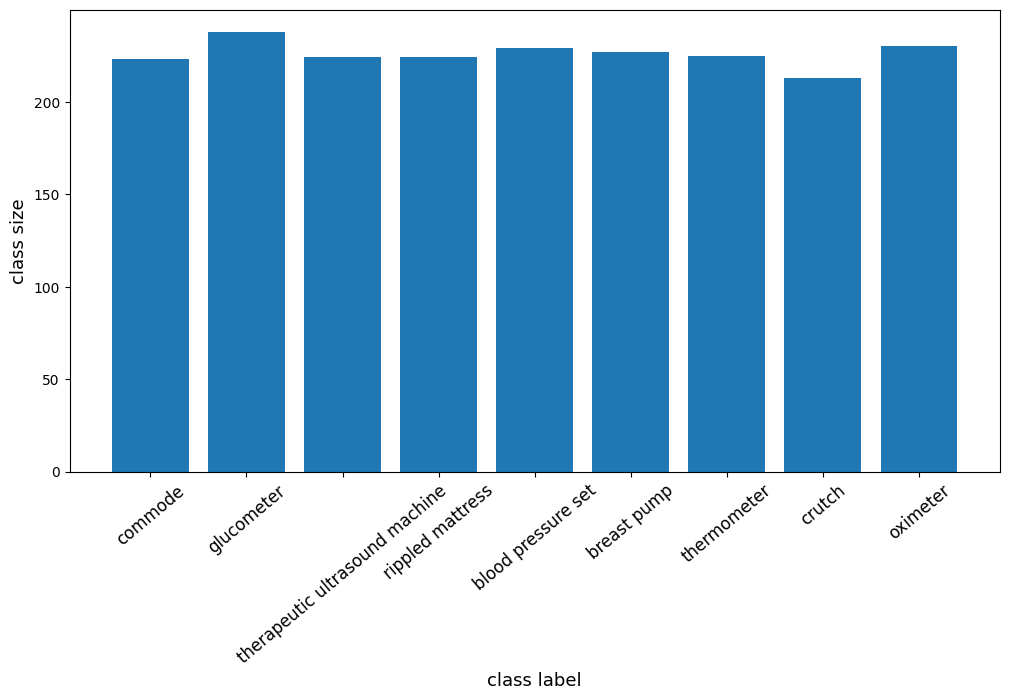

In [20]:
content = os.listdir(Train_dir)
counts = {}

for l in content:
    counts[l] = len(os.listdir(os.path.join(Train_dir, l)))

    
plt.figure(figsize=(12, 6))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=40)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)

In [50]:
batch_size = 64
input_shape = (299,299,3)
channels = 3
nums_classes = len(Train_dir)
#image generator in tensorflow
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescaling the images
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    Train_dir,
    target_size=(299, 299),  # Resize all images to 150x150
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
Test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2033 images belonging to 9 classes.
Found 562 images belonging to 9 classes.


In [53]:
print(train_generator.class_indices)

{'blood pressure set': 0, 'breast pump': 1, 'commode': 2, 'crutch': 3, 'glucometer': 4, 'oximeter': 5, 'rippled mattress': 6, 'therapeutic ultrasound machine': 7, 'thermometer': 8}


In [54]:
N_STEPS = train_generator.samples//batch_size
N_VAL_STEPS = test_generator.samples//batch_size
N_EPOCHS = 100
num_classes = len(train_generator.class_indices)

In [73]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense , Flatten,Dropout
from keras.optimizers import Adam , Adagrad,Adadelta
from keras.applications import VGG16,VGG19
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
num_classes

9

In [27]:
conv_base = VGG16(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
model = conv_base.output
model = Flatten()(model)
model = Dense(2048, activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(2048, activation='relu')(model)
model = Dropout(0.2)(model)
output_layer = Dense(len(content), activation='softmax')(model)
model = Model(inputs=conv_base.input, outputs=output_layer)





In [28]:
 model.compile(optimizer='Adam', loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])

In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# model.fit(..., callbacks=[early_stop])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │        18,44

 Total params: 23,125,833 (88.22 MB)

 Trainable params: 23,125,833 (88.22 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Number of batches per epoch
    epochs=30,
    validation_data=test_generator,
    validation_steps=50, # Number of batches for validation
     callbacks=[early_stop]
)

Epoch 1/30
 31/100 ━━━━━━━━━━━━━━━━━━━━ 1:13 1s/step - categorical_accuracy: 0.0988 - loss: 4.7201

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 732ms/step - categorical_accuracy: 0.1067 - loss: 3.6084 - val_categorical_accuracy: 0.0730 - val_loss: 2.1956
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 503ms/step - categorical_accuracy: 0.1017 - loss: 2.4734 - val_categorical_accuracy: 0.0730 - val_loss: 2.1868
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 508ms/step - categorical_accuracy: 0.1150 - loss: 3.5662 - val_categorical_accuracy: 0.0676 - val_loss: 2.1872
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 483ms/step - categorical_accuracy: 0.1014 - loss: 6.0098 - val_categorical_accuracy: 0.4181 - val_loss: 20.5089
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 444ms/step - categorical_accuracy: 0.1098 - loss: 1564.9722 - val_categorical_accuracy: 0.0747 - val_loss: 2.2036
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 500ms/step - categorical_accuracy: 0.1050 - loss: 2.1980 - val_categorical_accuracy: 0.0730 - val_loss: 2.1972
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 495ms/step - categorical_accuracy

In [35]:
conv_base = VGG19(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
model = conv_base.output
model = Flatten()(model)
model = Dense(2048, activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(2048, activation='relu')(model)
model = Dropout(0.2)(model)
output_layer = Dense(len(content), activation='softmax')(model)
model1 = Model(inputs=conv_base.input, outputs=output_layer)


In [36]:
 model1.compile(optimizer='Adam', loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])

In [37]:
model1.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2048)           │             

 Total params: 28,435,529 (108.47 MB)

 Trainable params: 28,435,529 (108.47 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model1.fit(
    train_generator,
    steps_per_epoch=100,  # Number of batches per epoch
    epochs=30,
    validation_data=test_generator,
    validation_steps=50  # Number of batches for validation
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 568ms/step - categorical_accuracy: 0.1178 - loss: 2.1969 - val_categorical_accuracy: 0.4235 - val_loss: 2.1785
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 478ms/step - categorical_accuracy: 0.1127 - loss: 2.1974 - val_categorical_accuracy: 0.4235 - val_loss: 2.1795
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 466ms/step - categorical_accuracy: 0.1150 - loss: 2.1970 - val_categorical_accuracy: 0.4235 - val_loss: 2.1786
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 460ms/step - categorical_accuracy: 0.1189 - loss: 2.1967 - val_categorical_accuracy: 0.4235 - val_loss: 2.1774
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 479ms/step - categorical_accuracy: 0.1093 - loss: 2.1977 - val_categorical_accuracy: 0.4235 - val_loss: 2.1806
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 466ms/step - categorical_accuracy: 0.1167 - loss: 2.1971 - val_categorical_accuracy: 0.4235 - val_loss: 2.1778
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 449ms/step - categorical_a

In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Define the model
model2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
# model2.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# model.fit(..., callbacks=[early_stop])

In [80]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch=75,  # Number of batches per epoch
    epochs=20,
    validation_data=test_generator,
    validation_steps=50,
    callbacks=[early_stop]# Number of batches for validation
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 113s 877ms/step - accuracy: 0.7421 - loss: 0.8252 - val_accuracy: 0.8505 - val_loss: 0.4178
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 722ms/step - accuracy: 0.9612 - loss: 0.1242 - val_accuracy: 0.9021 - val_loss: 0.3332
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 91s 757ms/step - accuracy: 0.9653 - loss: 0.1006 - val_accuracy: 0.9128 - val_loss: 0.3091
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 762ms/step - accuracy: 0.9765 - loss: 0.0719 - val_accuracy: 0.8861 - val_loss: 0.3962
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 738ms/step - accuracy: 0.9631 - loss: 0.0941 - val_accuracy: 0.9217 - val_loss: 0.2568
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 740ms/step - accuracy: 0.9828 - loss: 0.0499 - val_accuracy: 0.9253 - val_loss: 0.2705
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 724ms/step - accuracy: 0.9862 - loss: 0.0442 - val_accuracy: 0.9110 - val_loss: 0.3024
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 91s 748ms/step - accuracy: 0.9782 - loss: 

In [87]:
def load_and_preprocess_image(img_path, target_size=(299, 299)):  # Adjust target_size as per your model
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image as required by the model
    return img_array

# Path to the image you want to classify
cus ="/kaggle/input/custom-input-data"
for i in os.listdir(cus):
    img_path = cus+"/"+i# Load and preprocess the image
    input_data = load_and_preprocess_image(img_path)

    # Make predictions
    predictions = model2.predict(input_data)

    # If it's a classification problem, get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)


    
    print("Predicted class:", predicted_class)
    print(classes[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: [4]
glucometer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: [4]
glucometer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: [0]
blood pressure set
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: [5]
oximeter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: [5]
oximeter


In [90]:
model2.save("device1.h5")

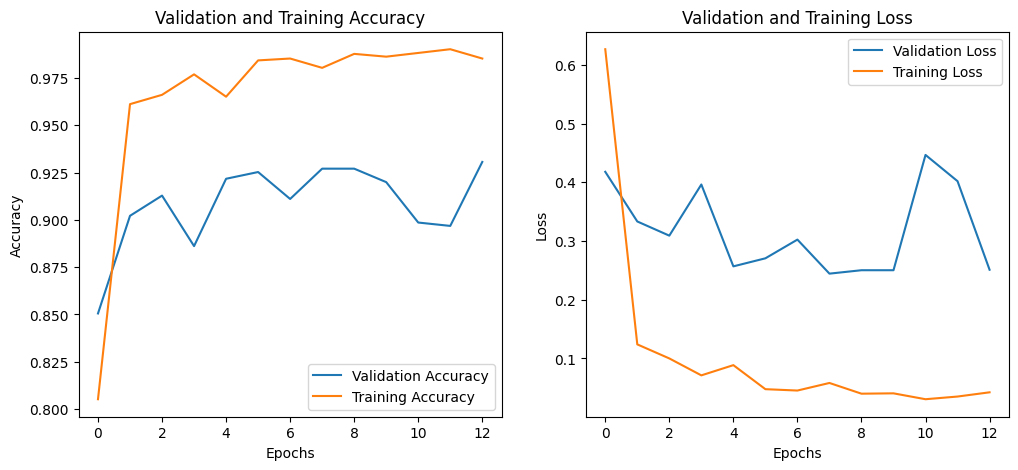

In [89]:
plt.figure(figsize=(12, 5))

# Plot validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation and Training Accuracy')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation and Training Loss')
plt.legend()

plt.show()

In [72]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions  # Assuming InceptionV3 model

# Load the trained model
model = load_model('/kaggle/working/device.h5')  # Replace with the path to your .h5 file

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(299, 299)):  # Adjust target_size as per your model
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image as required by the model
    return img_array

# Path to the image you want to classify
img_path = "/kaggle/input/medical-classification-dataset/medical equipment data sets/medical equipment data sets/testing/blood pressure set/bp (11).jpg"
# Load and preprocess the image
input_data = load_and_preprocess_image(img_path)

# Make predictions
predictions = model.predict(input_data)

# If it's a classification problem, get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)


print("Predicted class:", predicted_class)
print(classes[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class: [4]
glucometer


In [62]:
print(train_generator.class_indices)

{'blood pressure set': 0, 'breast pump': 1, 'commode': 2, 'crutch': 3, 'glucometer': 4, 'oximeter': 5, 'rippled mattress': 6, 'therapeutic ultrasound machine': 7, 'thermometer': 8}


In [65]:
classes = []
for i in train_generator.class_indices:
    classes.append(i)

In [67]:
print(classes[predicted_class[0]])

glucometer
